# Linear Regression in StatsModels - Lab

## Introduction

It's time to apply the StatsModels skills from the previous lesson! In this lab , you'll explore a slightly more complex example to study the impact of spending on different advertising channels on total sales.

## Objectives

You will be able to:

* Perform a linear regression using StatsModels
* Evaluate a linear regression model using StatsModels
* Interpret linear regression coefficients using StatsModels

## Let's Get Started

In this lab, you'll work with the "Advertising Dataset", which is a very popular dataset for studying simple regression. [The dataset is available on Kaggle](https://www.kaggle.com/purbar/advertising-data), but we have downloaded it for you. It is available in this repository as `advertising.csv`. You'll use this dataset to answer this question:

> Which advertising channel has the strongest relationship with sales volume, and can be used to model and predict the sales?

The columns in this dataset are:

1. `sales`: the number of widgets sold (in thousands)
2. `tv`: the amount of money (in thousands of dollars) spent on TV ads
3. `radio`: the amount of money (in thousands of dollars) spent on radio ads
4. `newspaper`: the amount of money (in thousands of dollars) spent on newspaper ads

## Step 1: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
# Check the columns and first few rows

# Load the data
data = pd.read_csv('advertising.csv')

# Check the columns and first few rows
print(data.columns)
print(data.head())


Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')
   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [3]:
# Generate summary statistics for data with .describe()

print(data.describe())


       Unnamed: 0          TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


Based on what you have seen so far, describe the contents of this dataset. Remember that our business problem is asking us to build a model that predicts sales.

Every record in our dataset shows the advertising budget spend on TV, newspaper, and radio campaigns as well as a target variable, sales.

The count for each is 200, which means that we do not have any missing data.

Looking at the mean values, it appears that spending on TV is highest, and spending on radio is lowest. This aligns with what we see in the output from head()



<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Every record in our dataset shows the advertising budget spend on TV, newspaper, and radio campaigns as well as a target variable, sales.

The count for each is 200, which means that we do not have any missing data.

Looking at the mean values, it appears that spending on TV is highest, and spending on radio is lowest. This aligns with what we see in the output from `head()`.
    
</details>

Now, use scatter plots to plot each predictor (TV, radio, newspaper) against the target variable.

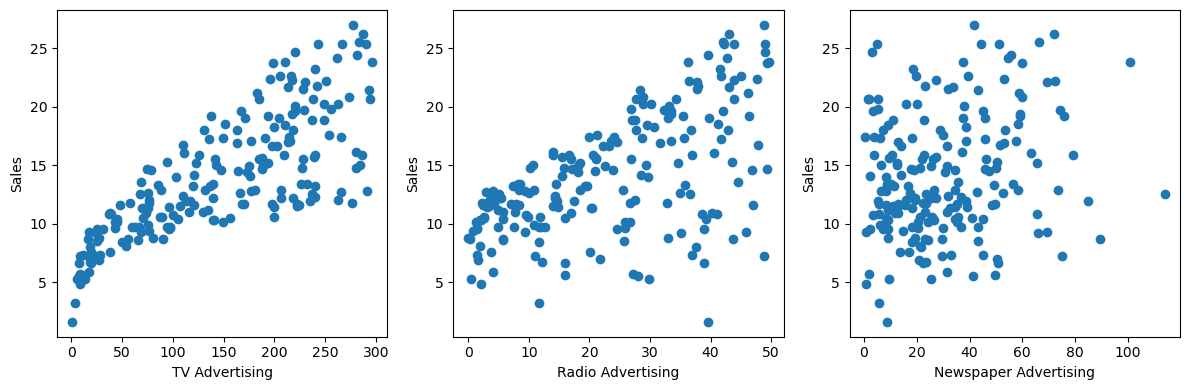

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('advertising.csv')

# Create scatter plots
plt.figure(figsize=(12, 4))

# TV vs. Sales
plt.subplot(1, 3, 1)
plt.scatter(data['TV'], data['sales'])
plt.xlabel('TV Advertising')
plt.ylabel('Sales')

# Radio vs. Sales
plt.subplot(1, 3, 2)
plt.scatter(data['radio'], data['sales'])
plt.xlabel('Radio Advertising')
plt.ylabel('Sales')

# Newspaper vs. Sales
plt.subplot(1, 3, 3)
plt.scatter(data['newspaper'], data['sales'])
plt.xlabel('Newspaper Advertising')
plt.ylabel('Sales')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


Does there appear to be a linear relationship between these predictors and the target?

# Record your observations on linearity here 

TV Advertising vs. Sales: There appears to be a positive linear relationship between TV advertising spending and sales. As the TV advertising budget increases, the sales tend to increase as well.

Radio Advertising vs. Sales: There also seems to be a positive linear relationship between radio advertising spending and sales. However, compared to TV advertising, the relationship appears to be slightly less strong.

Newspaper Advertising vs. Sales: The scatter plot for newspaper advertising spending and sales does not clearly indicate a strong linear relationship. The data points are more spread out and do not follow a clear pattern.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

`TV` seems to be a good predictor because it has the most linear relationship with sales.

`radio` also seems to have a linear relationship, but there is more variance than with `TV`. We would expect a model using `radio` to be able to predict the target, but not as well as a model using `TV`.

`newspaper` has the least linear-looking relationship. There is a lot of variance as well. It's not clear from this plot whether a model using `newspaper` would be able to predict the target.
    
</details>

## Step 2: Run a Simple Linear Regression with `TV` as the Predictor

As the analysis above indicates, `TV` looks like it has the strongest relationship with `sales`. Let's attempt to quantify that using linear regression.

In [7]:
import statsmodels.api as sm

# Determine X and y values
X = data['TV']
y = data['sales']

# Add constant to X values
X = sm.add_constant(X)

# Create an OLS model
model = sm.OLS(y, X)


In [8]:
# Get model results

results = model.fit()

# Display results summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           1.47e-42
Time:                        00:25:58   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

## Step 3: Evaluate and Interpret Results from Step 2

How does this model perform overall? What do the coefficients say about the relationship between the variables?

# Your answer here

The simple linear regression model using TV as the predictor variable explains approximately 61.2% of the variance in the sales data. This is indicated by the R-squared value of 0.612. The adjusted R-squared value of 0.610 suggests that the model's performance is still relatively good even after adjusting for the number of predictors.

The coefficient for the constant term (intercept) is 7.0326, indicating that when the TV advertising budget is zero, the model predicts a sales volume of 7.0326 units (in thousands).

The coefficient for the TV predictor variable is 0.0475, indicating that for every unit increase in the TV advertising budget (in thousands of dollars), the model predicts an increase in sales volume by 0.0475 units (in thousands).

Both the constant and TV coefficients are statistically significant with very low p-values (p < 0.001), suggesting a strong relationship between the advertising budget spent on TV and the sales volume.

Overall, the model suggests that TV advertising has a positive and significant impact on sales, with higher advertising budgets leading to higher sales volumes. However, it's important to note that this is a simple linear regression model, and there may be other factors not accounted for in this analysis that also influence sales.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Overall the model and coefficients are **statistically significant**, with all p-values well below a standard alpha of 0.05.

The R-squared value is about 0.61 i.e. **61% of the variance in the target variable can be explained by TV spending**.

The intercept is about 7.0, meaning that if we spent 0 on TV, we would expect sales of about 7k widgets (the units of `sales` are in thousands of widgets).

The `TV` coefficient is about 0.05, meaning that **for each additional &dollar;1k spent on TV (the units of `TV` are in thousands of dollars), we would expect to sell an additional 50 widgets**. (More precisely, 47.5 widgets.)

Note that all of these coefficients represent associations rather than causation. It's possible that better sales are what leads to more TV spending! Either way, `TV` seems to have a strong relationship with `sales`.

</details>

## Step 4: Visualize Model with `TV` as Predictor

Create at least one visualization that shows the prediction line against a scatter plot of `TV` vs. sales, as well as at least one visualization that shows the residuals.

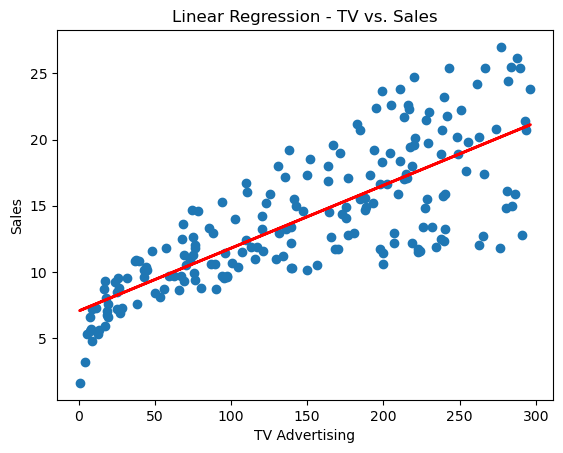

In [17]:
# Plot the model fit (scatter plot and regression line)

# Scatter plot with regression line
plt.scatter(data['TV'], data['sales'])
plt.plot(data['TV'], results.predict(), color='red', linewidth=2)
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('Linear Regression - TV vs. Sales')
plt.show()


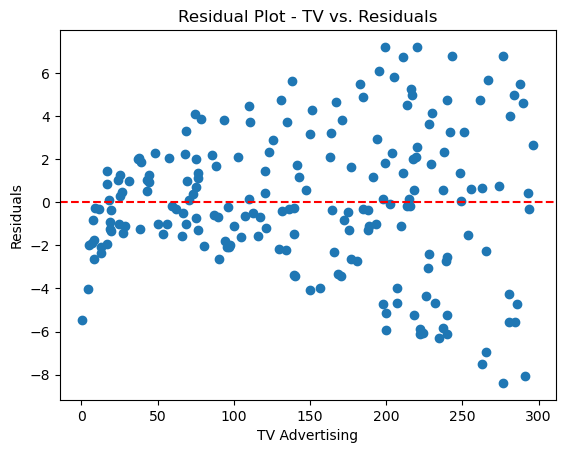

In [18]:
# Plot the model residuals

residuals = results.resid
plt.scatter(data['TV'], residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('TV Advertising')
plt.ylabel('Residuals')
plt.title('Residual Plot - TV vs. Residuals')
plt.show()

## Step 5: Repeat Steps 2-4 with `radio` as Predictor

Compare and contrast the model performance, coefficient value, etc. The goal is to answer the business question described above.

In [19]:
# Determine X and y values
X = data['radio']
y = data['sales']

# Add constant to X values
X = sm.add_constant(X)

# Create an OLS model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Display results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           4.35e-19
Time:                        02:08:06   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.0

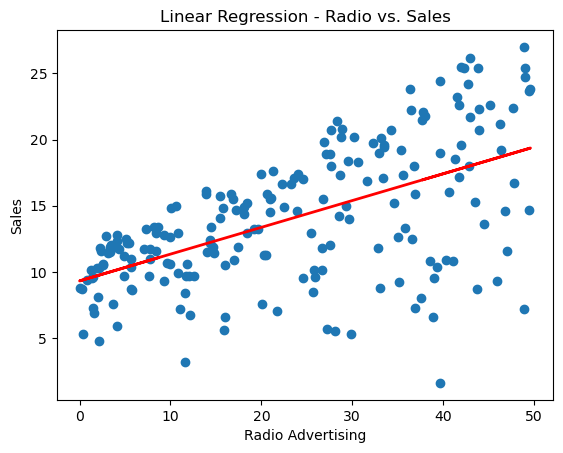

In [20]:
# Visualize model fit

# Scatter plot with regression line
plt.scatter(data['radio'], data['sales'])
plt.plot(data['radio'], results.predict(), color='red', linewidth=2)
plt.xlabel('Radio Advertising')
plt.ylabel('Sales')
plt.title('Linear Regression - Radio vs. Sales')
plt.show()

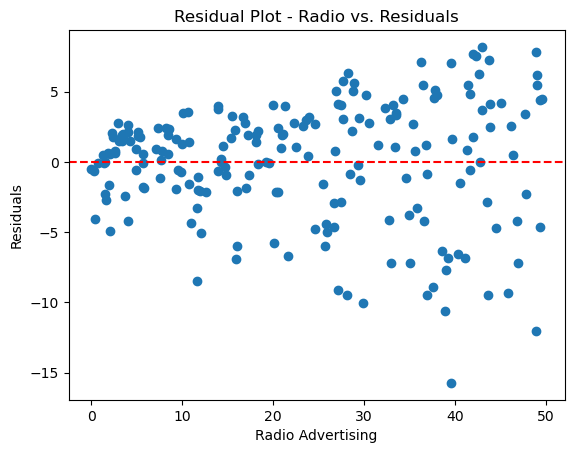

In [21]:
# Visualize residuals

# Residual plot
residuals = results.resid
plt.scatter(data['radio'], residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Radio Advertising')
plt.ylabel('Residuals')
plt.title('Residual Plot - Radio vs. Residuals')
plt.show()


# Your interpretation here


Model Performance:

R-squared: 0.332
Adjusted R-squared: 0.329
F-statistic: 98.42
Prob (F-statistic): 4.35e-19
Coefficient Values:

Constant (intercept): 9.3116
Radio coefficient: 0.2025
Interpretation:

The R-squared value of 0.332 indicates that approximately 33.2% of the variability in sales can be explained by the 'radio' advertising channel alone.
The coefficient for 'radio' is 0.2025, which suggests that for every unit increase in radio advertising spending, we can expect a 0.2025 unit increase in sales, holding other variables constant.
The p-value for the radio coefficient is very small (p < 0.001), indicating that the relationship between radio advertising and sales is statistically significant.
Comparing with the previous analysis using TV as the predictor, we can observe the following differences:

The R-squared value for the model with 'radio' as the predictor (0.332) is lower than the R-squared value for the model with 'TV' as the predictor (0.612). This suggests that the 'TV' advertising channel has a stronger relationship with sales compared to 'radio'.
The coefficient value for 'radio' (0.2025) is smaller than the coefficient value for 'TV' (0.0475). This indicates that, on average, the impact of 'radio' advertising on sales is smaller than the impact of 'TV' advertising.
Visualizations:

The scatter plot with the regression line shows the relationship between 'radio' advertising and sales. The regression line represents the estimated linear relationship between the two variables.
The residual plot displays the residuals (the differences between the actual sales values and the predicted sales values) against the 'radio' advertising values. The residuals appear to be randomly scattered around the horizontal line, indicating that the assumption of homoscedasticity (constant variance) is reasonably satisfied.
Based on these findings, we can conclude that while 'radio' advertising has a statistically significant relationship with sales, it explains a smaller portion of the variability in sales compared to 'TV' advertising. Therefore, in terms of predicting sales, 'TV' advertising appears to be a stronger predictor than 'radio' advertising.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Same as with `TV`, the model using `radio` to predict `sales` as well as its parameters are **statistically significant** (p-values well below 0.05).

However, this model explains less of the variance. It only **explains about 33% of the variance in `sales`**, compared to about 61% explained by `TV`. If our main focus is the percentage of variance explained, this is a worse model than the `TV` model.

On the other hand, the coefficient for `radio` is much higher. **An increase of &dollar;1k in radio spending is associated with an increase of sales of about 200 widgets!** This is roughly 4x the increase of widget sales that we see for `TV`.

Visualizing this model, it doesn't look much different from the `TV` model.
    
So, how should we answer the business question? Realistically, you would need to return to your stakeholders to get a better understanding of what they are looking for. Do they care more about the variable that explains more variance, or do they care more about where an extra &dollar;1k of advertising spending is likely to make the most difference?

</details>

## Step 6: Repeat Steps 2-4 with `newspaper` as Predictor

Once again, use this information to compare and contrast.

In [22]:
# Run model

# Display results

# Determine X and y values
X = data['newspaper']
y = data['sales']

# Add constant to X values
X = sm.add_constant(X)

# Create an OLS model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Display results summary
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 29 Jun 2023   Prob (F-statistic):            0.00115
Time:                        02:11:17   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.0

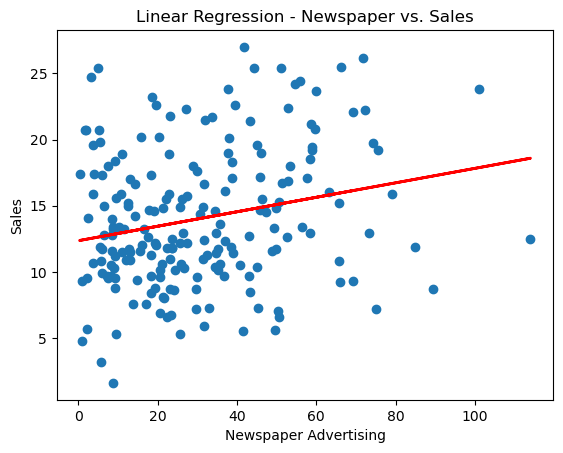

In [23]:
# Visualize model fit

# Visualize model fit
plt.scatter(data['newspaper'], data['sales'])
plt.plot(data['newspaper'], results.predict(), color='red', linewidth=2)
plt.xlabel('Newspaper Advertising')
plt.ylabel('Sales')
plt.title('Linear Regression - Newspaper vs. Sales')
plt.show()

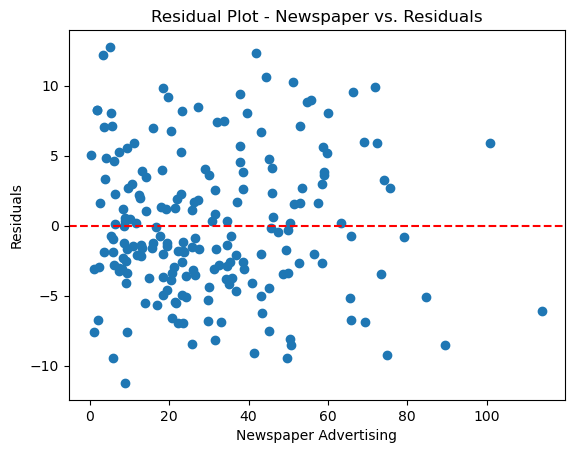

In [24]:
# Visualize residuals

residuals = results.resid
plt.scatter(data['newspaper'], residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Newspaper Advertising')
plt.ylabel('Residuals')
plt.title('Residual Plot - Newspaper vs. Residuals')
plt.show()


# Your interpretation here


Model Performance:

The R-squared value is 0.052, indicating that only 5.2% of the variance in sales can be explained by the 'newspaper' advertising variable. This means that the model with 'newspaper' as the predictor has a weak explanatory power compared to the models with 'TV' and 'radio' predictors.
The adjusted R-squared value is 0.047, which takes into account the number of predictors in the model. It suggests that 'newspaper' does not significantly contribute to improving the model's fit compared to the intercept-only model.

Coefficient Interpretation:

The coefficient for the 'newspaper' predictor is 0.0547. This indicates that, on average, a one-unit increase in 'newspaper' advertising is associated with a 0.0547 unit increase in sales.
The p-value for the 'newspaper' coefficient is 0.001, which is statistically significant at a typical significance level of 0.05. This suggests that there is evidence to reject the null hypothesis that the coefficient is zero.


Visual Interpretation:

The scatter plot with the regression line shows the relationship between 'newspaper' advertising and sales. The line represents the predicted sales values based on the regression equation. However, the scatter plot reveals a wide spread of data points and a lack of a clear linear pattern, indicating that the relationship between 'newspaper' advertising and sales may not be well-captured by a simple linear model.
The residual plot displays the differences between the actual sales values and the predicted sales values from the model. The residuals appear randomly scattered around the horizontal line at zero, indicating that the assumptions of linearity and constant variance may not be violated.
In comparison to the models with 'TV' and 'radio' predictors, the model with 'newspaper' performs poorly in terms of explaining the variance in sales. The coefficient for 'newspaper' is smaller compared to the coefficients for 'TV' and 'radio' in their respective models, indicating a weaker relationship between 'newspaper' advertising and sales. Therefore, based on the available data, it seems that 'newspaper' advertising may not be as effective or influential in driving sales as 'TV' and 'radio' advertising.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Technically our model and coefficients are **still statistically significant** at an alpha of 0.05, but the p-values are much higher. For both the F-statistic (overall model significance) and the `newspaper` coefficient, our p-values are about 0.001, meaning that there is about a 0.1% chance that a variable with _no linear relationship_ would produce these statistics. That is a pretty small false positive rate, so we'll consider the model to be statistically significant and move on to interpreting the other results.

The R-Squared here is the smallest we have seen yet: 0.05. This means that **the model explains about 5% of the variance in `sales`**. 5% is well below both the `radio` model (33%) and the `TV` model (61%).

The coefficient is also small, though similar to the `TV` coefficient. **An increase of &dollar;1k in newspaper spending is associated with about 50 additional widget sales** (more precisely, about 54.7). This is still much less than the 200-widget increase associated with &dollar;1k of additional `radio` spending.

Visualizing this model, the best-fit line is clearly not a strong predictor. On the other hand, the residuals exhibit _homoscedasticity_, meaning that the distribution of the residuals doesn't vary much based on the value of `newspaper`. This contrasts with the `radio` and `TV` residuals which exhibit a "cone" shape, where the errors are larger as the x-axis increases. Homoscedasticity of residuals is a good thing, which we will describe more in depth when we discuss regression assumptions.

Once again, how should we answer the business question? Regardless of the framing, it is unlikely that `newspaper` is the answer that your stakeholders want. This model has neither the highest R-Squared nor the highest coefficient.

</details>

## Summary

In this lab, you ran a complete regression analysis with a simple dataset. You used StatsModels to perform linear regression and evaluated your models using statistical metrics as well as visualizations. You also reached a conclusion about how you would answer a business question using linear regression.